In [19]:
# Import TensorFlow

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #Esto apra evitar error de certificado ssl a la hora de descargar el dataset CIFAR10

In [20]:

from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
CIFAR10 = keras.datasets.cifar10

In [4]:
def vis_res(history, epocas):
  epochs = [i for i in range(epocas)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  train_loss = history.history["loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento Accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion Accuracy")
  ax[0].set_title("Entrenamiento & validación MAPE")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("MAPE %")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss Categorical Accuracy")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Categorical Accuracy")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

In [5]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

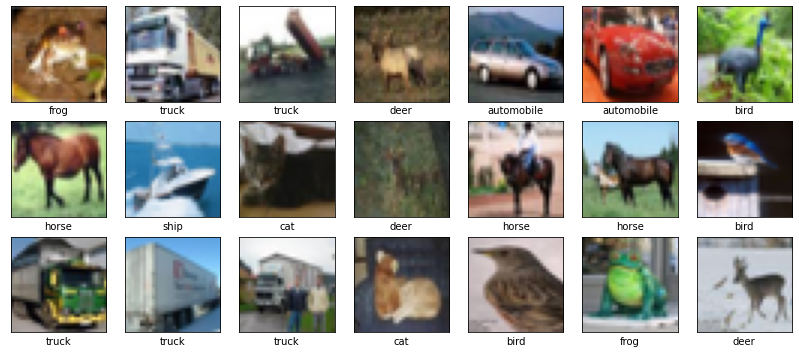

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(x_train, y_train, class_names)

In [9]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 10))

In [11]:
model_01 = keras.models.Sequential()
model_01.add(layers.Flatten(input_shape=[32,32,3]))
model_01.add(layers.Dense(units=256, activation='relu'))
model_01.add(layers.Dense(units=128, activation='relu'))
model_01.add(layers.Dense(units=10, activation='softmax'))

model_01.compile(optimizer='adam', 
              loss= 'categorical_crossentropy',
              metrics=['accuracy'],
              )


In [12]:
print('Training model...\n')

history = model_01.fit(x=x_train, y=y_train, 
                    batch_size=None,
                    epochs=10, 
                    validation_split=0.2, 
                    shuffle=True)

print('Model trained successfully!')

Training model...

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 1.8908 - accuracy: 0.3165 - val_loss: 1.7614 - val_accuracy: 0.3710
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7050 - accuracy: 0.3899 - val_loss: 1.7129 - val_accuracy: 0.3908
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6333 - accuracy: 0.4132 - val_loss: 1.6330 - val_accuracy: 0.4154
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5747 - accuracy: 0.4354 - val_loss: 1.6224 - val_accuracy: 0.4210
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5355 - accuracy: 0.4477 - val_loss: 1.5710 - val_accuracy: 0.4475
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5070 - accuracy: 0.4587 - val_loss: 1.5504 - val_accuracy: 0.4556
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4802 - accuracy: 0.4694 - val_loss: 1.5

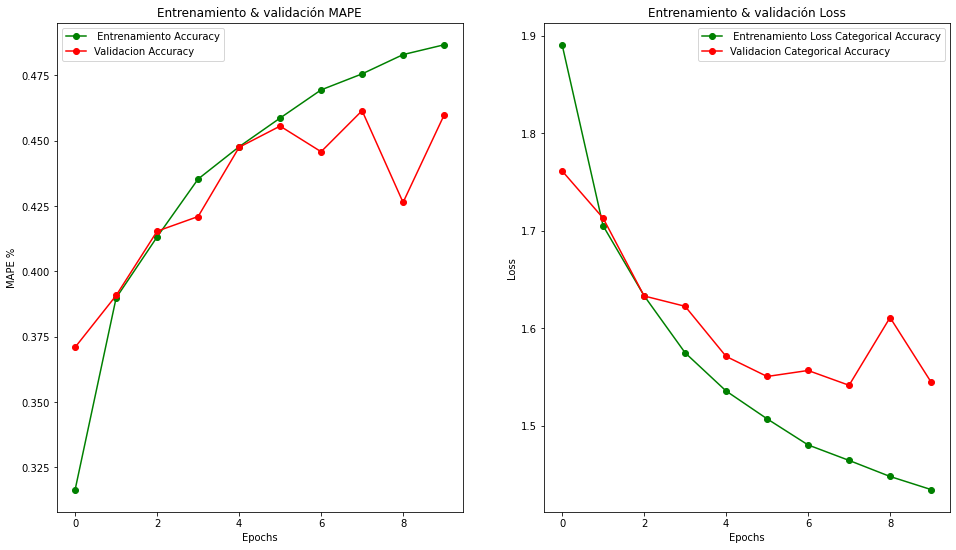

In [13]:
vis_res(history, 10)

In [14]:
loss, SCA = model_01.evaluate(x_test, y_test)
print('loss=',round(loss*100,2),'%')
print('Accuracy=',round(SCA*100,2),'%')

313/313 [==============================] - 1s 4ms/step - loss: 1.5210 - accuracy: 0.4620
loss= 152.1 %
Accuracy= 46.2 %


In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.keras.backend.clear_session() 

Augmentation_01

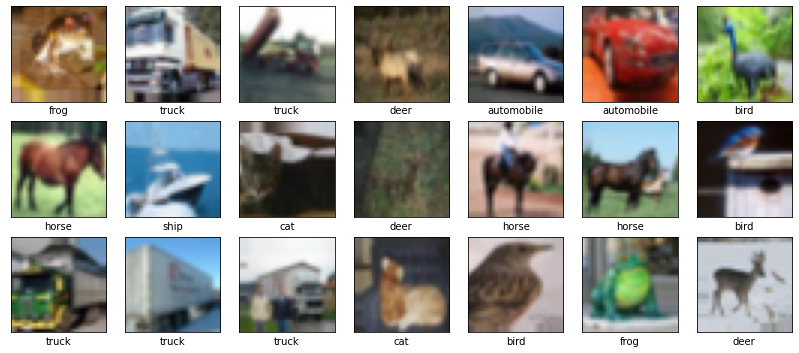

In [35]:
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

In [29]:
from keras.layers import Flatten

In [36]:
model_02 = keras.models.Sequential()
model_02.add(layers.Flatten(input_shape=[32,32,3]))
model_02.add(layers.Dense(units=256, activation='relu'))
model_02.add(layers.Dense(units=128, activation='relu'))
model_02.add(layers.Dense(units=10, activation='softmax'))

model_02.compile(optimizer='adam', 
              loss= 'categorical_crossentropy',
              metrics=['accuracy'],
              )

In [40]:
datagen.fit(x_train)

hst_aug = model_02.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test))
# loss_aug, acc_aug = m_aug.evaluate(x_test,  y_test)



Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.7649 - accuracy: 0.3639 - val_loss: 1.6746 - val_accuracy: 0.3999
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6925 - accuracy: 0.3929 - val_loss: 1.5871 - val_accuracy: 0.4342
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6431 - accuracy: 0.4104 - val_loss: 1.5449 - val_accuracy: 0.4475
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6183 - accuracy: 0.4183 - val_loss: 1.5532 - val_accuracy: 0.4476
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6012 - accuracy: 0.4255 - val_loss: 1.5276 - val_accuracy: 0.4522
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5753 - accuracy: 0.4364 - val_loss: 1.5140 - val_accuracy: 0.4639
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5704 - accuracy: 0.4396 - val_loss: 1.4918 -

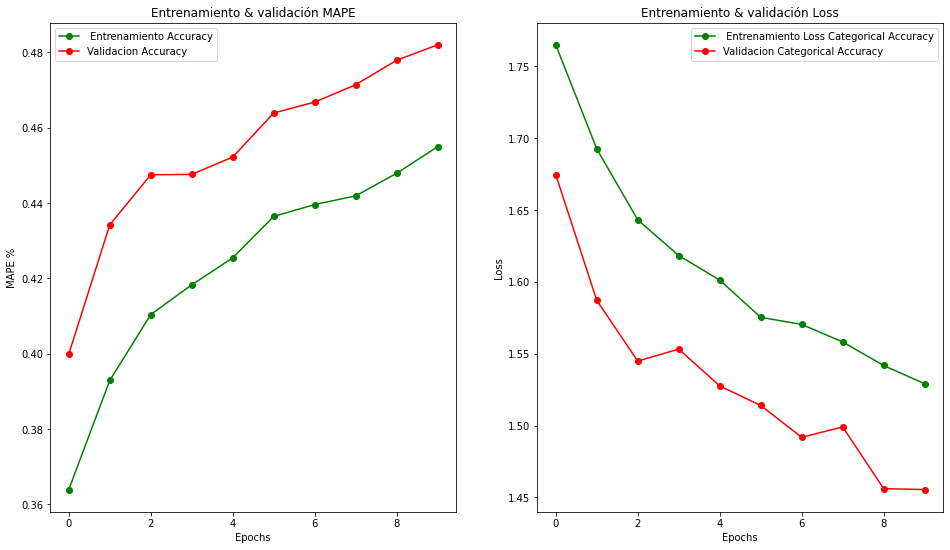

In [41]:
vis_res(hst_aug, 10)

In [42]:
loss, SCA = model_02.evaluate(x_test, y_test)
print('loss=',round(loss,2),'%')
print('Accuracy=',round(SCA*100,2),'%')

313/313 [==============================] - 1s 4ms/step - loss: 1.4555 - accuracy: 0.4820
loss= 1.46 %
Accuracy= 48.2 %


In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.keras.backend.clear_session() 

In [24]:
model.save('/content/path_to_my_model.h5')

In [ ]:
# new_model = keras.models.load_model('path_to_my_model.h5') 
#Cargar modelo entrenado y realizar predicciones 

Augmentation_02

In [26]:
width_shift = 8/32
height_shift = 8/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    rotation_range=90,
    zoom_range=[0.5,1.0]
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=True)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

In [12]:
from keras.layers import LSTM

In [17]:
from keras.layers import Flatten

In [1]:
# nodes_per_layer = [1024,512,256,128,64]
model_03 = keras.models.Sequential()
model_03.add(layers.Flatten(input_shape=[32,32,3]))
model_03.layers.Dense(units=128, return_sequences=True)
model_03.add(LSTM(units=64))
model_03.add(Dense(128))
model_03.add(Dense(num_classes, activation='softmax'))
model_03.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


model_02 = keras.models.Sequential()
model_02.add(layers.Flatten(input_shape=[32,32,3]))
model_02.add(layers.Dense(units=256, activation='relu'))
model_02.add(layers.Dense(units=128, activation='relu'))
model_02.add(layers.Dense(units=10, activation='softmax'))




NameError: name 'keras' is not defined

In [11]:
datagen.fit(x_train)

hst_aug03 = model_03.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=3,
    validation_data=0.2)

Epoch 1/3


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[32,1024] labels_size=[32,10]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at tmp/ipykernel_27765/2285152732.py:2) ]] [Op:__inference_train_function_593]

Function call stack:
train_function


In [4]:
(train_images, train_labels), (test_images, test_labels) = CIFAR10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
print(train_images.shape)
print(train_images.dtype)

(50000, 32, 32, 3)
uint8


In [6]:
print(train_labels.shape)

(50000, 1)


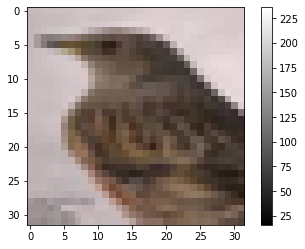

In [7]:
plt.figure()
plt.imshow(train_images[18], cmap='gray')
plt.colorbar()

In [8]:
#Escalamos los valores de pixeles entre 0 y 1
x_train = train_images/255. 
x_test = test_images/255. 

In [9]:
# Reorganizamos en forma de fila  los valores de las clases usando la funcion  flatten()
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

In [10]:
# Calcular numero de clases
K = len(set(train_labels))
print("numero de clases:", K)

numero de clases: 10


In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship,', 'truck']

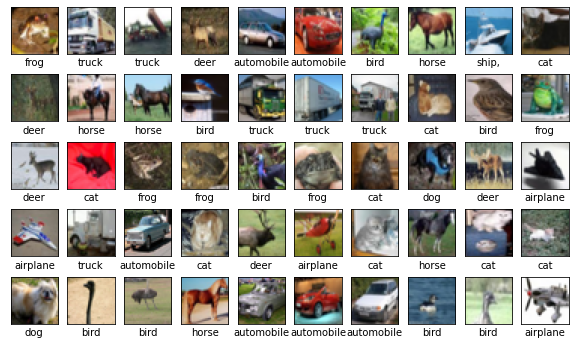

In [12]:
plt.figure(figsize=(10,6))
for i in range(50): # 50 el numero de imagenes
    plt.subplot(5,10,i+1) # 5 filas de  10columnas
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
from tensorflow.keras import layers

In [86]:
model = keras.models.Sequential()

model.add(layers.Flatten(input_shape=[32,32,3]))

model.add(layers.Dense(units=1024, kernel_initializer=keras.initializers.glorot_uniform, bias_initializer=keras.initializers.Zeros, activation='relu'))
model.add(layers.Dense(units=512, activation='relu'))
# model.add(layers.Dense(units=256, activation='relu'))
# model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))



In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer='adam',
              loss= keras.losses.sparse_categorical_crossentropy,
              metrics=['sparse_categorical_crossentropy'])

In [32]:
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

In [33]:
# model.evaluate(x_test, test_labels)

In [89]:
print('Training model...\n')

history = model.fit(x=x_train, 
                    y=train_labels, 
                    batch_size=20,
                    epochs=20, 
                    validation_split=0.2, 
                    shuffle=True)

print('Model trained successfully!')

Training model...

Epoch 1/20
2000/2000 [==============================] - 11s 6ms/step - loss: 1.8895 - sparse_categorical_crossentropy: 1.8895 - val_loss: 1.7837 - val_sparse_categorical_crossentropy: 1.7837
Epoch 2/20
1380/2000 [===================>..........] - ETA: 3s - loss: 1.7088 - sparse_categorical_crossentropy: 1.7088

In [80]:
df_history = pd.DataFrame(history.history)
df_history

,loss,sparse_categorical_crossentropy,val_loss,val_sparse_categorical_crossentropy
0,0.495601,0.495601,3.251420,3.251420
1,0.483324,0.483324,3.488101,3.488101
2,0.493274,0.493274,3.320596,3.320596
3,0.472453,0.472453,3.540947,3.540947
4,0.474387,0.474387,3.636051,3.636051
5,0.489196,0.489196,3.382145,3.382145
6,0.480795,0.480795,3.471102,3.471102
7,0.455185,0.455185,3.587036,3.587036
8,0.472959,0.472959,3.766966,3.766966
9,0.471378,0.471378,3.520496,3.520496


In [ ]:
def vis_res(historia, epocas):
  epochs = [i for i in range(epocas)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["sparse_categorical_crossentropy"]
  val_acc = history.history["val_sparse_categorical_crossentropy"]
  val_loss = history.history["val_loss"]
  train_loss = history.history["loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento SCC")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion SCC")
  ax[0].set_title("Entrenamiento & validación SCC")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("SCC")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

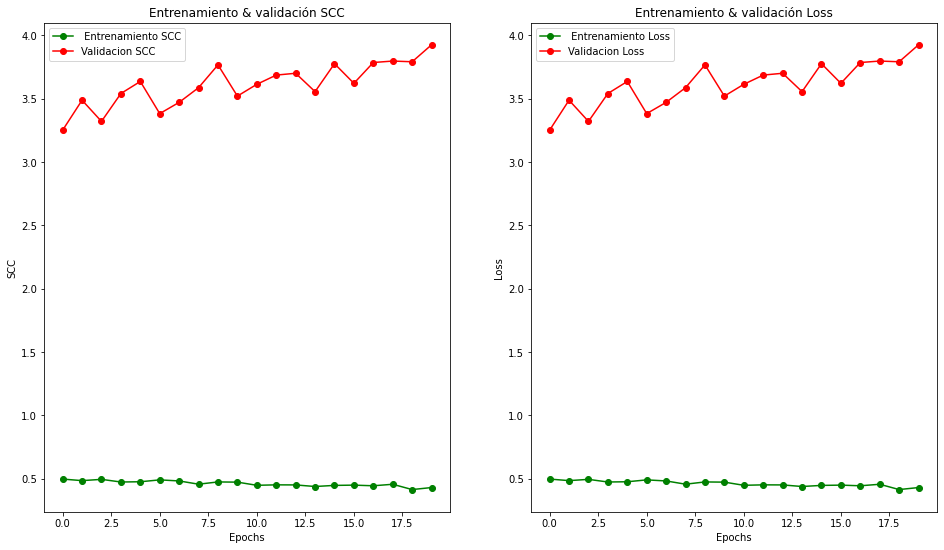

In [ ]:
vis_res(history,20)

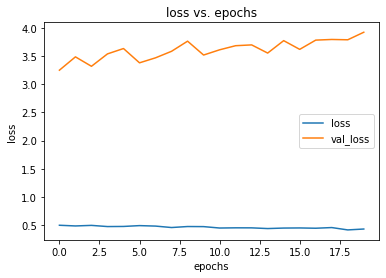

In [84]:
df_history.plot(y=['loss', 'val_loss'], title='loss vs. epochs', xlabel='epochs', ylabel='loss', legend=True)

In [85]:
df_history.plot(y=['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'],
                title='Train Accuracy vs. Val. Accuracy',
                xlabel='epochs',
                ylabel='Accuracy',
                legend=True
                )

KeyError: "None of [Index(['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'], dtype='object')] are in the [columns]"

In [51]:
loss, Accuracy = model.evaluate(x_test, test_labels)
print('loss=',round(loss*100,2),'%')
print('Accuracy=',round(Accuracy*100,2),'%')

313/313 [==============================] - 1s 4ms/step - loss: 1.5463 - sparse_categorical_accuracy: 0.4890
loss= 154.63 %
Accuracy= 48.9 %


### Hagamos predicciones

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
test_labels[0]

3

In [ ]:
#Funciones esto para poder ver todo el set de la prediccion de las 10 clases.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

A continaucion muestro la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

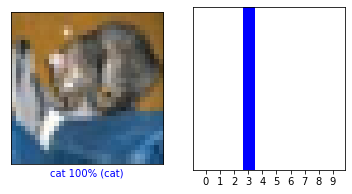

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

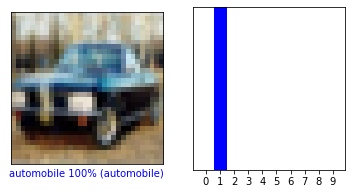

In [ ]:
i = 1500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Multiples imagenes con sus predicciones

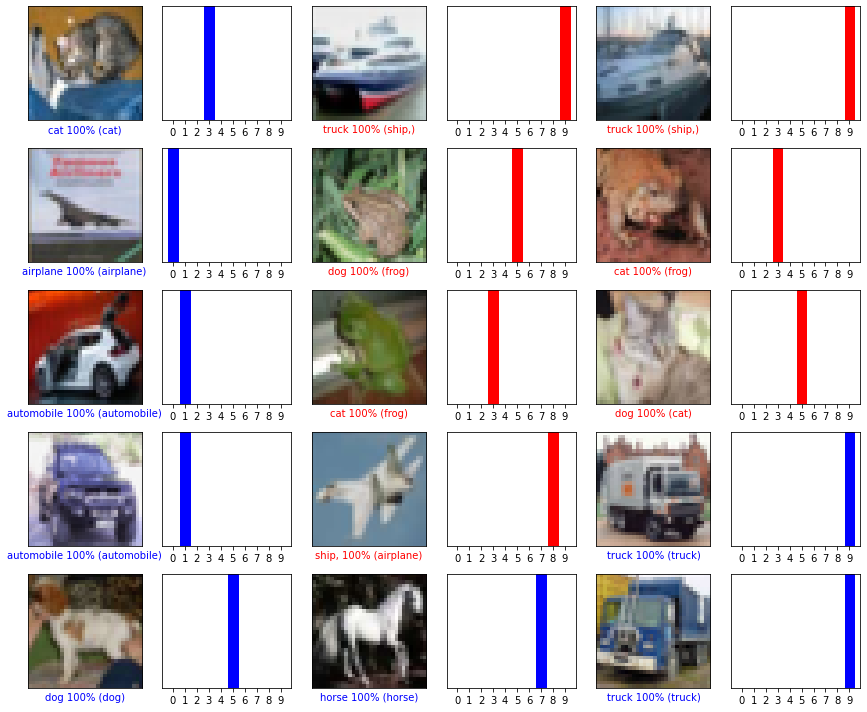

In [ ]:
# Visualizamos las primeras x imagenes, su etiqueta predicted y la etiqueta real.
# Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()